#### Author : Swati Rustagi
#### Designation : Data Science & Business Analyst Intern
#### Task by: GRIP @ The Sparks Foundation

#### Task 1 : Prediction using Supervised Machine Learning
<b> Level - Beginner </b>

- Predict the percentage of an student based on the no. of study hours. 
- This is a simple linear regression task as it involves just 2 variables.
- You can use R, Python, SAS Enterprise Miner or any other tool 
- Data can be found at http://bit.ly/w-data
- What will be predicted score if a student studies for 9.25 hrs/ day? 

<b> Importing Libraries </b>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings

warnings.simplefilter("ignore")

print("libraries loded successfully!!")

C:\Users\lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


libraries loded successfully!!


<b> Loading Data </b>

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<b> Checking Shape </b>

In [3]:
print("Shape of Dataset is {} rows and {} columns".format(*data.shape))

Shape of Dataset is 25 rows and 2 columns


<b> Checking for missing values <b>

In [4]:
# Missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_cols = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_cols = mis_val_table_cols[mis_val_table_cols.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]))   
        print("There are " + str(mis_val_table_cols.shape[0])+" columns that have missing values.")
        return mis_val_table_cols

missing_values_table(data).style.background_gradient(cmap='plasma')

Your selected dataframe has 2
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<b> Checking for basic details </b>

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<b> Checking if any duplicated entry is present </b>

In [7]:
data.duplicated().any()

False

<b> Data Visualization </b>

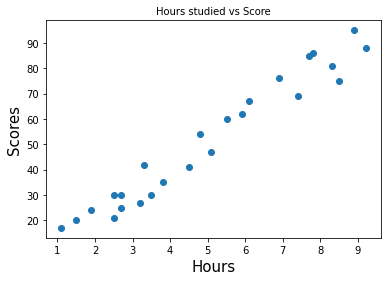

In [8]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(data.Hours,data.Scores)
plt.show()

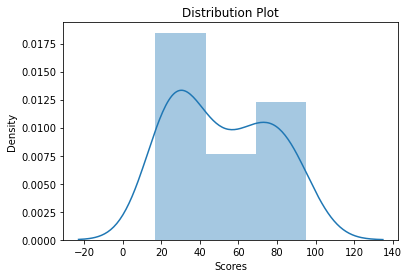

In [9]:
sns.distplot(data.Scores)
plt.title('Distribution Plot')
plt.show()

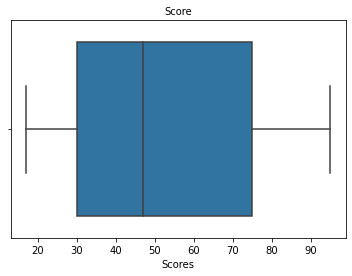

In [10]:
plt.title('Score', fontsize=10)
sns.boxplot(data.Scores)
plt.show()

<b> Data Split </b> 

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

<b> Spliting into train and test dataset </b>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
print("Shape of train split is {} rows and {} columns".format(X_train.shape, y_train.shape))
print("Shape of test split is {} rows and {} columns".format(X_test.shape, y_test.shape))

Shape of train split is (18, 1) rows and (18,) columns
Shape of test split is (7, 1) rows and (7,) columns


<b> Model Building </b>

In [14]:
Lin_Reg = LinearRegression()
Lin_Reg.fit(X_train.reshape(-1,1), y_train)
pred = Lin_Reg.predict(X_test)

<b> Plotting the prediction </b>

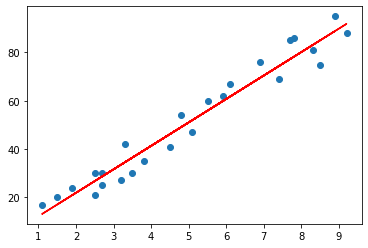

In [15]:
# Plotting the regression line
line = Lin_Reg.coef_*X + Lin_Reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

<b> Model Evaluation </b>

In [16]:
print("Training Score:",round(Lin_Reg.score(X_train,y_train)*100, 2))
print("Test Score:",round(Lin_Reg.score(X_test,y_test)*100, 2))

Training Score: 95.15
Test Score: 95.54


<b> Testing for the problem statement below:-</b>
- What will be predicted score if a student studies for 9.25 hrs/ day? 

In [17]:
hours = 9.25
test_element = np.array([hours]).reshape(-1,1)

In [18]:
pred_element = Lin_Reg.predict(test_element)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(pred_element[0]),2))

No of Hours = 9.25
Predicted Score = 92


#### End of Submission